**TITLE**

Classification Analysis of Sepsis

**PROJECT DESCRIPTION**


This project is about developing a classification model to predict if patients test positive or negative for Sepsis. Also, a web application will be developed with the best model
Sepsis is the body’s extreme response to an infection and can be life-threatening. Sepsis happens when an infection you already have triggers a chain reaction throughout your body. In most cases, bacteria infection are the causes of Sepsis. People who are ata risk for developing sepis include adults who are 65 and above; children younger than one; people with chronic diseases such as diabetes, lung disease, cancer; people with weakened immune system among others.
This is a classification project since the goal is to predict the label of the class to which the input belongs i.e. Negative or Positive.

**Hypothesis**

Null hypothesis: There is no  relationship bettween high plasma glucose levels and Sepsis

Alternative hypothesis: There is a relationship between high plasma glucose levels and Sepsis

**Analytical Questions**

1. What is the distribution of ages for patients captured in the data?
2. Which age group are more prone to developing sepsis?
3. Does the blood parameters  have an association with sepsis?
4. Is body mass directly correlated with a patients tendency to get sepsis?
5. Is plasma glucose leves Index affected by Age?

**SETUP**

**Importation**

This section shows the various libraries that will be used for the analysis

In [1]:
# Data Handling

import pandas as pd
import numpy as np
import joblib
#Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Other packages
import os
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

**Loading Data**

The datasets that will be used for the analysis is loaded in this section

In [2]:

train_df = pd.read_csv("../Assets/Paitients_Files_Train.csv")
test_df = pd.read_csv("../Assets/Paitients_Files_Test.csv")

## EXPLORATORY DATA ANALYSIS(EDA)

**Dataset Overview**

The the first five and last rows of the dataset is shown. The information and datatypes are checked. Again, null values among others are explored

In [3]:
train_df. head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [4]:
test_df. tail()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
164,ICU200773,10,101,76,48,180,32.9,0.171,63,1
165,ICU200774,2,122,70,27,0,36.8,0.340,27,1
166,ICU200775,5,121,72,23,112,26.2,0.245,30,1
167,ICU200776,1,126,60,0,0,30.1,0.349,47,1
168,ICU200777,1,93,70,31,0,30.4,0.315,23,1


In [5]:
# Define new column names for better understanding
new_column_names = {
    'PRG': 'Plasma_glucose',
    'PL': 'Blood_Work_Result_1',
    'PR': 'Blood_Pressure',
    'SK': 'Blood_Work_Result_2',
    'TS': 'Blood_Work_Result_3',
    'M11': 'Body_mass_index',
    'BD2': 'Blood_Work_Result_4',
    'Sepssis': 'Sepsis'
}

train_df.rename(columns=new_column_names, inplace=True)
test_df.rename(columns=new_column_names, inplace=True)

In [6]:
train_df.columns

Index(['ID', 'Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index',
       'Blood_Work_Result_4', 'Age', 'Insurance', 'Sepsis'],
      dtype='object')

In [7]:
test_df.columns

Index(['ID', 'Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index',
       'Blood_Work_Result_4', 'Age', 'Insurance'],
      dtype='object')

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   599 non-null    object 
 1   Plasma_glucose       599 non-null    int64  
 2   Blood_Work_Result_1  599 non-null    int64  
 3   Blood_Pressure       599 non-null    int64  
 4   Blood_Work_Result_2  599 non-null    int64  
 5   Blood_Work_Result_3  599 non-null    int64  
 6   Body_mass_index      599 non-null    float64
 7   Blood_Work_Result_4  599 non-null    float64
 8   Age                  599 non-null    int64  
 9   Insurance            599 non-null    int64  
 10  Sepsis               599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   169 non-null    object 
 1   Plasma_glucose       169 non-null    int64  
 2   Blood_Work_Result_1  169 non-null    int64  
 3   Blood_Pressure       169 non-null    int64  
 4   Blood_Work_Result_2  169 non-null    int64  
 5   Blood_Work_Result_3  169 non-null    int64  
 6   Body_mass_index      169 non-null    float64
 7   Blood_Work_Result_4  169 non-null    float64
 8   Age                  169 non-null    int64  
 9   Insurance            169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


In [10]:
#check for train data shape
train_df.shape

(599, 11)

In [11]:
#check for test data shape
test_df.shape

(169, 10)

**Remarks**

Both the train and test data has 599 rows and 11 columns

**Check for Null Values**

In [12]:
train_df.isnull().sum()

ID                     0
Plasma_glucose         0
Blood_Work_Result_1    0
Blood_Pressure         0
Blood_Work_Result_2    0
Blood_Work_Result_3    0
Body_mass_index        0
Blood_Work_Result_4    0
Age                    0
Insurance              0
Sepsis                 0
dtype: int64

In [13]:
test_df.isnull().sum()

ID                     0
Plasma_glucose         0
Blood_Work_Result_1    0
Blood_Pressure         0
Blood_Work_Result_2    0
Blood_Work_Result_3    0
Body_mass_index        0
Blood_Work_Result_4    0
Age                    0
Insurance              0
dtype: int64

**Remark**

There are no null values in both the test and train data

In [14]:
#Checking for unique values
train_df.nunique()

ID                     599
Plasma_glucose          17
Blood_Work_Result_1    129
Blood_Pressure          44
Blood_Work_Result_2     51
Blood_Work_Result_3    164
Body_mass_index        233
Blood_Work_Result_4    437
Age                     50
Insurance                2
Sepsis                   2
dtype: int64

**Checking for Duplicates**

In [15]:
train_df.duplicated().sum()

0

In [16]:
test_df.duplicated().sum()

0

**Remark**

There are no duplicates in the dataset

**Descriptive Statistics**

In [17]:
train_df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,599,599,ICU200010,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Plasma_glucose,599.0,NaN,NaN,NaN,3.824708,3.362839,0.0,1.0,3.0,6.0,17.0
Blood_Work_Result_1,599.0,NaN,NaN,NaN,120.153589,32.682364,0.0,99.0,116.0,140.0,198.0
Blood_Pressure,599.0,NaN,NaN,NaN,68.732888,19.335675,0.0,64.0,70.0,80.0,122.0
Blood_Work_Result_2,599.0,NaN,NaN,NaN,20.562604,16.017622,0.0,0.0,23.0,32.0,99.0
Blood_Work_Result_3,599.0,NaN,NaN,NaN,79.460768,116.576176,0.0,0.0,36.0,123.5,846.0
Body_mass_index,599.0,NaN,NaN,NaN,31.920033,8.008227,0.0,27.1,32.0,36.55,67.1
Blood_Work_Result_4,599.0,NaN,NaN,NaN,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,NaN,NaN,NaN,33.290484,11.828446,21.0,24.0,29.0,40.0,81.0
Insurance,599.0,NaN,NaN,NaN,0.686144,0.464447,0.0,0.0,1.0,1.0,1.0


In [18]:
test_df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,169,169,ICU200609,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Plasma_glucose,169.0,NaN,NaN,NaN,3.91716,3.402415,0.0,1.0,3.0,6.0,13.0
Blood_Work_Result_1,169.0,NaN,NaN,NaN,123.52071,29.259123,56.0,102.0,120.0,141.0,199.0
Blood_Pressure,169.0,NaN,NaN,NaN,70.426036,19.426805,0.0,62.0,74.0,80.0,114.0
Blood_Work_Result_2,169.0,NaN,NaN,NaN,20.443787,15.764962,0.0,0.0,23.0,32.0,49.0
Blood_Work_Result_3,169.0,NaN,NaN,NaN,81.0,110.720852,0.0,0.0,0.0,135.0,540.0
Body_mass_index,169.0,NaN,NaN,NaN,32.249704,7.444886,0.0,27.6,32.4,36.6,57.3
Blood_Work_Result_4,169.0,NaN,NaN,NaN,0.438876,0.306935,0.1,0.223,0.343,0.587,1.698
Age,169.0,NaN,NaN,NaN,33.065089,11.54811,21.0,24.0,28.0,42.0,70.0
Insurance,169.0,NaN,NaN,NaN,0.727811,0.44641,0.0,0.0,1.0,1.0,1.0


**Remarks**

From the above, the average age is 33 years with the youngest age being 21 years and the oldest being 81 years. Again the plasma glucose was around 4 for the average. The mean blood pressure is 68.732888 mm hg which is lower than 80 mm hg, hence indicates that the patients had averagely a normal pressure
With the exception of Blood_Work_Result_4, the rest of the variables had a lot of variance in the observed data around the mean. This is to say there is a high standard deviation in the data giving an indication that the data is quite spread out.

**Distribution of the Data**

How the data is spread out and the shape of the graph when all possible values are plotted on a frequency graph was explored 

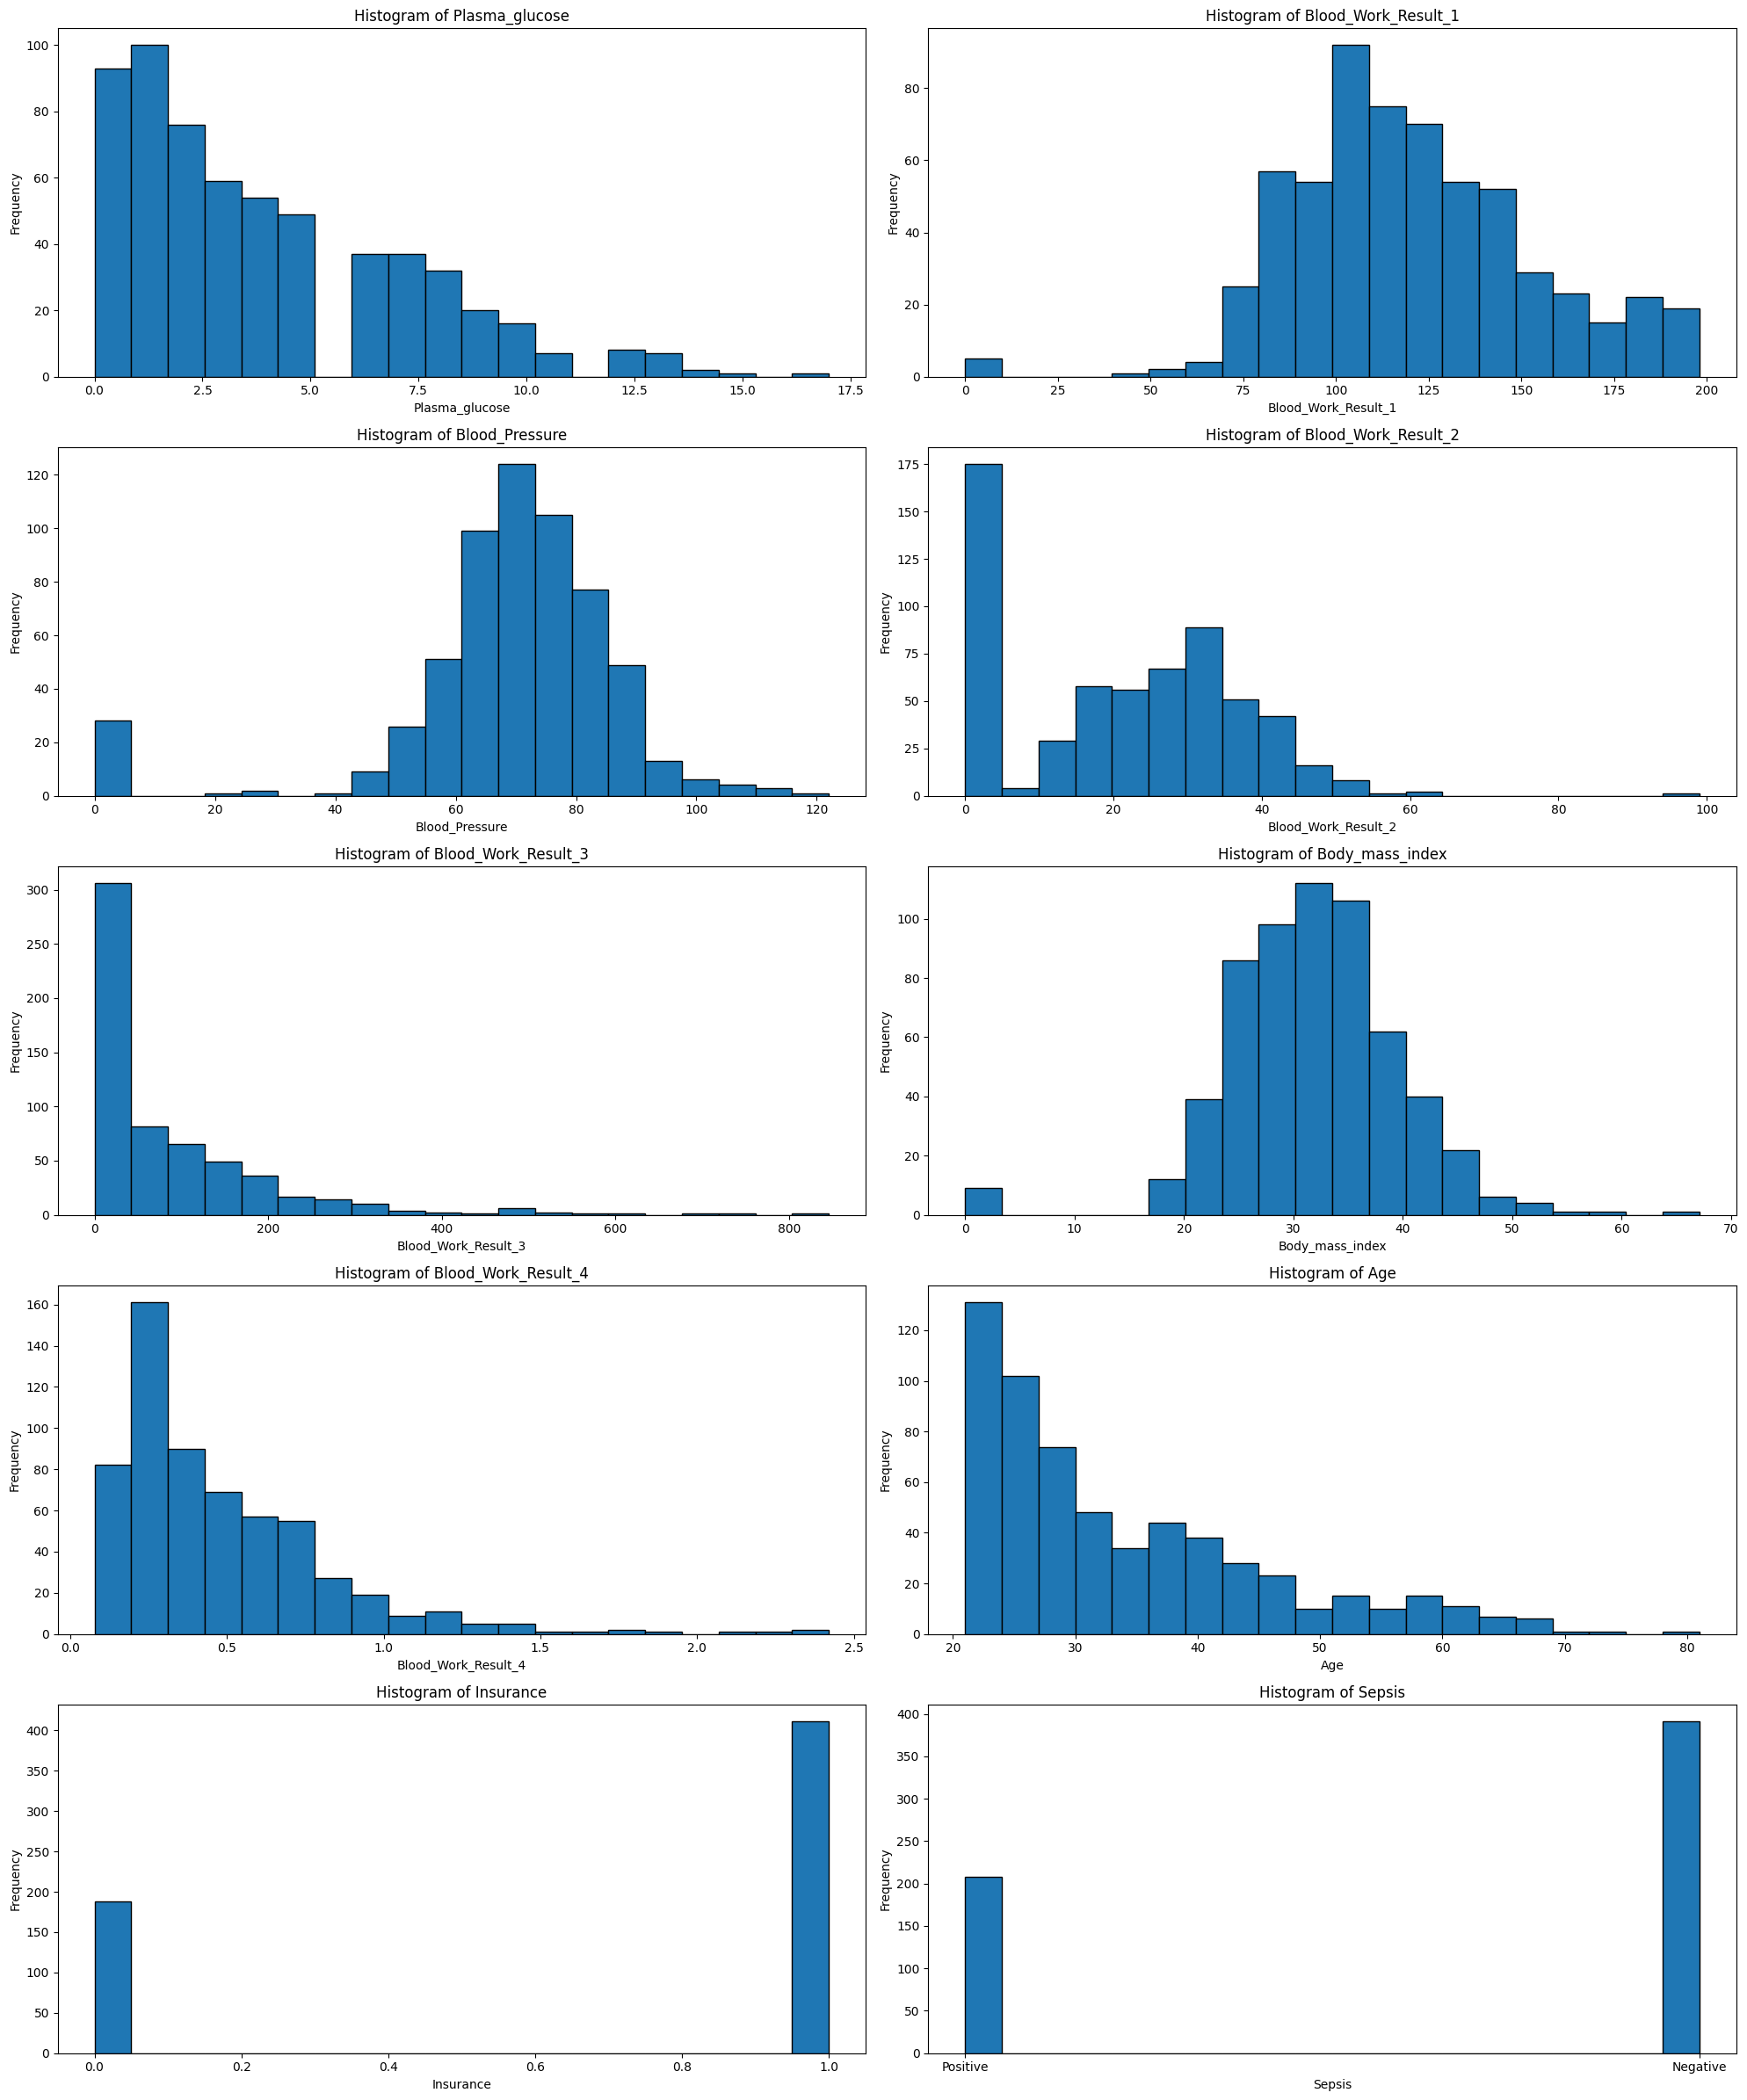

In [19]:

columns_to_plot = ['Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
           'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index',
           'Blood_Work_Result_4', 'Age', 'Insurance', 'Sepsis']

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 24))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Loop through columns and create histograms
for i, column in enumerate(columns_to_plot):
    axes[i].hist(train_df[column], bins=20, edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

**Remarks**

It is observed that Blood Work Result-3, Blood Work Result-4, Age, Plasma glucose, Blood Work Result-1, Blood Work Result-2 are all positively skewed while Blood Pressure, Insurance, Body mass index are negatively skewed

**Hypothesis Testing**

In [20]:
import scipy.stats as stats

# Select the plasma glucose and sepsis columns from the dataset
Plasma_Glucose = train_df['Plasma_glucose']
Sepsis = (train_df['Sepsis'] == 'Positive').astype(bool).astype(int)

# Perform correlation analysis
correlation, p_value = stats.pearsonr(Plasma_Glucose, Sepsis)

# Print the correlation coefficient and p-value
print("Correlation coefficient:", correlation)
print("P-value:", p_value)

if p_value > 0.05:
    print('Fail to reject the null hypothesis. ')
else:
    print('Reject the null hypothesis')


Correlation coefficient: 0.20711491012845204
P-value: 3.154172341568841e-07
Reject the null hypothesis


Since the p-value(0.00) is is less than the alpha value(0.05), the null hypothesis that there is no relationship between plasma glucose levels and sepsis is rejected. This indicates that plama levels makes one succeptible to Sepsis

## UNIVARIATE ANALYSIS

Selected variables in the dataset were explored Separately

In [21]:
#Sepsiss Column
label_counts = train_df['Sepsis'].value_counts()
label_counts

Sepsis
Negative    391
Positive    208
Name: count, dtype: int64

Text(0, 0.5, 'Count')

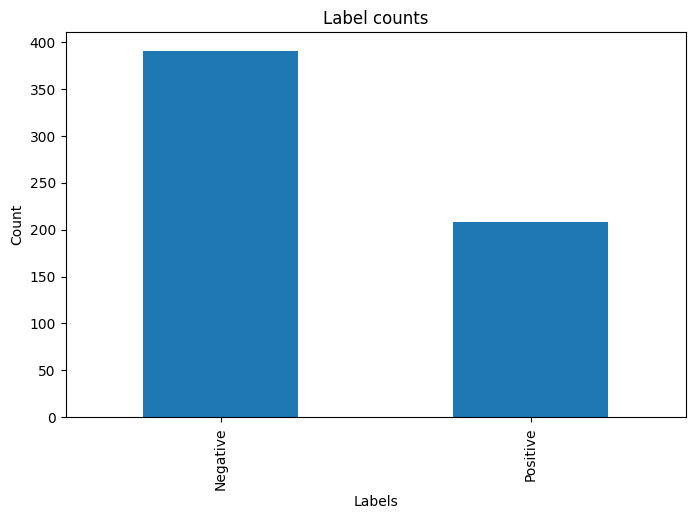

In [22]:
plt.figure(figsize=(8, 5))
label_counts.plot.bar()
plt.title('Label counts')
plt.xlabel('Labels')
plt.ylabel('Count')

**Remarks**

The number of patients who tested negative were almost double  as the ones that tested positve. This gives an indication of a slight class imbalance in the data. 

In [23]:
age_count = train_df['Age'].value_counts()
age_count

Age
22    52
21    52
25    40
24    37
23    27
29    27
28    26
26    25
27    21
41    20
31    19
37    18
30    16
33    15
42    13
32    13
36    13
38    13
46    11
35    10
39    10
34     9
45     8
40     8
43     8
51     7
58     7
44     7
52     5
60     5
57     5
47     4
62     4
55     4
50     4
54     4
48     3
59     3
65     3
53     3
66     3
49     3
63     3
67     3
61     2
56     2
69     1
72     1
81     1
64     1
Name: count, dtype: int64

Text(0, 0.5, 'Count')

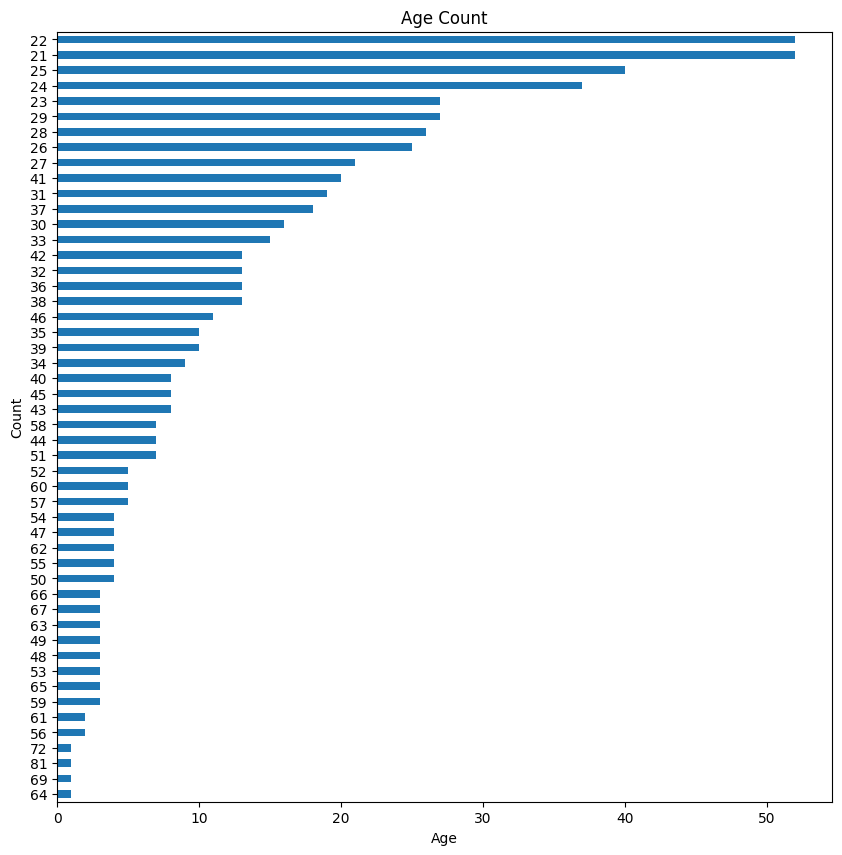

In [24]:
plt.figure(figsize=(10, 10))
age_count.sort_values(ascending=True).plot(kind='barh')
plt.title('Age Count')
plt.xlabel('Age')
plt.ylabel('Count')

**Remarks**


 The ages 21 and 22 had the highest number (52) of patients while 64,69, 72 and 81 had the lowest number (1) of patients.


 ## The Distribution of Ages for Patients Captured in the Data

(0.0, 80.0)

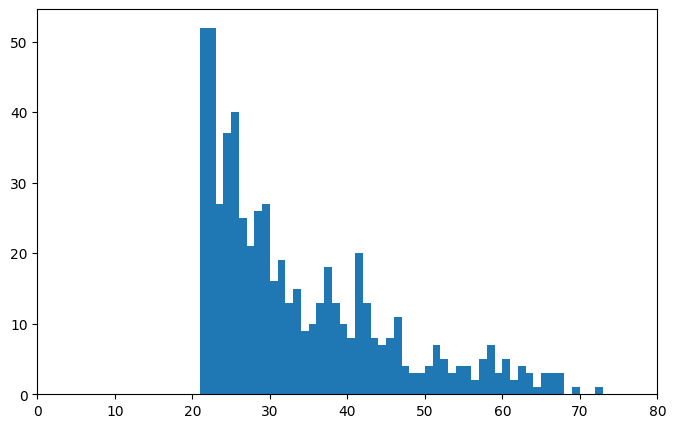

In [25]:
age_bins = np.arange(0, train_df ['Age'].max()+1, 1)
plt.figure(figsize=[8, 5])
plt.hist(data = train_df, x = 'Age', bins=age_bins)
plt.xlim(0, 80)

**Remark**

From the distribution, majority of the patients were between 20 and 40 years of age

## BIVARIATE ANALYSIS

Here, relationships between two variables were explored

**Association of Age and Sepsis**

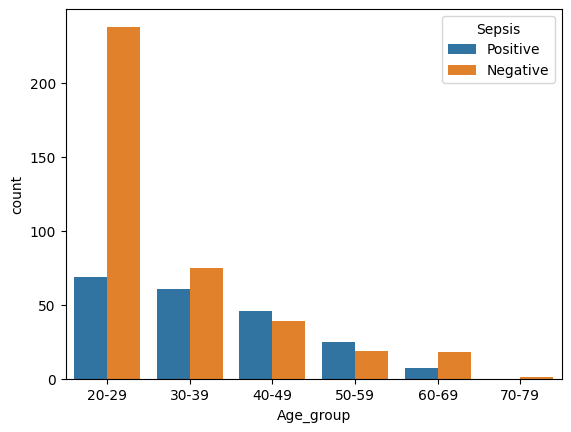

In [26]:

# Create the bin edges for the age groups
bins = list(range(20, 81, 10))

# Create the bin labels for the age groups (7 labels for 8 bins)
basket = ['{0}-{1}'.format(i, i + 9) for i in range(20, 81, 10)[:-1]]

# Use pd.cut() to assign age groups to each 'Age' value
train_df['Age_group'] = pd.cut(train_df['Age'], bins=bins, labels=basket, right=False)

# Plot the count of each age group colored by 'Sepsis'
sns.countplot(data=train_df, x='Age_group', hue='Sepsis');

**Remarks**

It is observed that relatively, the age group 20-29 are less succeptible to sepsis as compared to those from the ages 0f 40-59  and those between the ages of 60-69 are the most suceptible to sepsis. This can be attributed to the fact that as one ages, one becomes succeptible to sepsis due to weakening ot the immune system


**Relationship between Insurance and Sepsis**

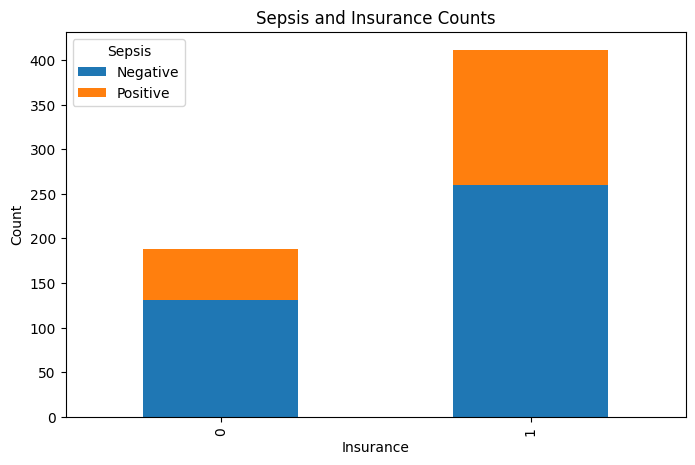

In [27]:

# Group by 'Sepsis' and 'Insurance' and count occurrences
grouped = train_df.groupby(['Sepsis', 'Insurance'], as_index=False)['ID'].count()

# Pivot the data to have 'Sepsis' as columns and 'Insurance' as index
pivot = grouped.pivot(index='Insurance', columns='Sepsis', values='ID')

# Plotting
pivot.plot(kind='bar', stacked=True, figsize=(8, 5))

# Setting labels and title
plt.xlabel('Insurance')
plt.ylabel('Count')
plt.title('Sepsis and Insurance Counts')

# Show the plot
plt.show()

**Remarks**

From the plot the number of patients with insurance were more than those without insurance. More than half of the insured patients tested negative to sepsis and this was also the true for patients without insurance.

**Relationship between Body Mass Index and the Number of Patients**

In [28]:
# function to create a new column 'Bmi'
def create_bmi_range(row):
    if (row['Body_mass_index'] <= 18.5):
        return 'Under Weight'
    elif (row['Body_mass_index'] > 18.5) and (row['Body_mass_index'] <= 24.9):
        return 'Healthy Weight'
    elif (row['Body_mass_index'] > 24.9) and (row['Body_mass_index'] <= 29.9):
        return 'Over Weight'
    elif (row['Body_mass_index'] > 29.9) and (row['Body_mass_index'] < 40):
        return 'Obesity'
    elif row['Body_mass_index'] >= 40:
        return 'Severe Obesity'

In [29]:
train_df = train_df.copy()

In [30]:
train_df['BMI Ranges'] = train_df.apply(create_bmi_range, axis=1)
range_count = train_df['BMI Ranges'].value_counts()

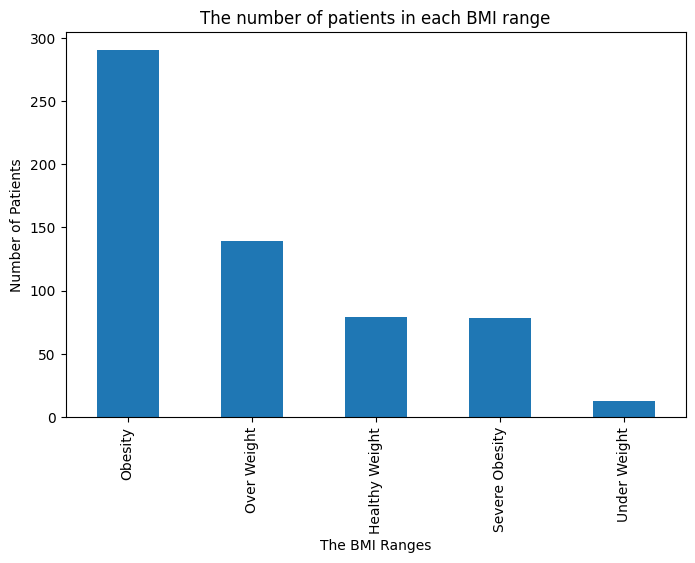

In [31]:
# plot graph
plt.figure(figsize=(8, 5))
range_count.plot.bar()
plt.title('The number of patients in each BMI range')
plt.xlabel('The BMI Ranges')
plt.ylabel('Number of Patients')
plt.show()

**Remarks**

From the graph,it is evident that most of the patients fall under the obesity category. The next category with a higher number of patients was the over weight category. The least was Under Weight category

**Relationship between Body Mass and Sepsis**

In [32]:
body_mass = train_df.groupby(['Sepsis', 'BMI Ranges'], as_index=False)['ID'].count()
body_mass

,Sepsis,BMI Ranges,ID
0,Negative,Healthy Weight,75
1,Negative,Obesity,159
2,Negative,Over Weight,110
3,Negative,Severe Obesity,35
4,Negative,Under Weight,12
5,Positive,Healthy Weight,4
6,Positive,Obesity,131
7,Positive,Over Weight,29
8,Positive,Severe Obesity,43
9,Positive,Under Weight,1


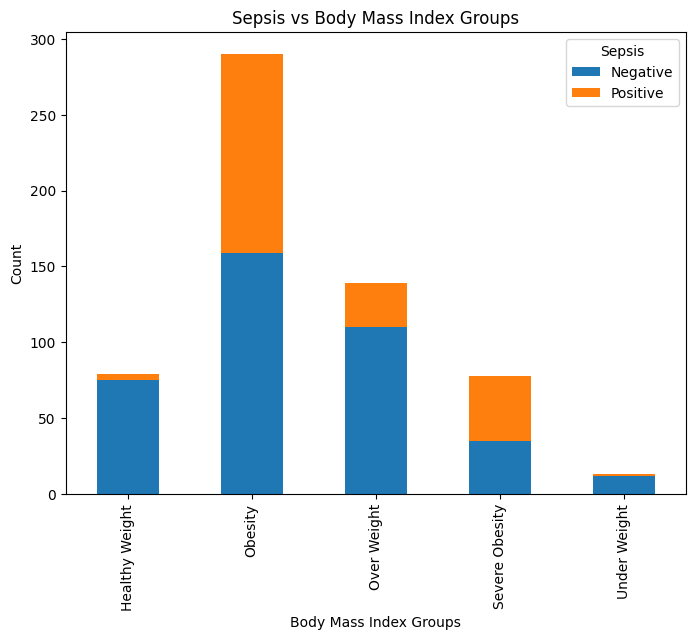

In [33]:
# Pivot the data to have Sepsis as columns and Insurance as index
bmi_pivot = body_mass.pivot(index='BMI Ranges', columns='Sepsis', values='ID')
# Plotting
bmi_pivot.plot(kind='bar', stacked=True, figsize=(8, 6))
# Setting labels and title
plt.xlabel('Body Mass Index Groups')
plt.ylabel('Count')
plt.title('Sepsis vs Body Mass Index Groups')
plt.show()

**Remark**

From the graph, almost half of patients who were obessed and severely obessed had sepsis. Patients who were overweight were also prone to sepsis. Few patients with healthy weight had sepsis. This shows that body mass index influences one's chances of developing Sepsis.

**Relationship between Plasma Glucose Levels and Age**


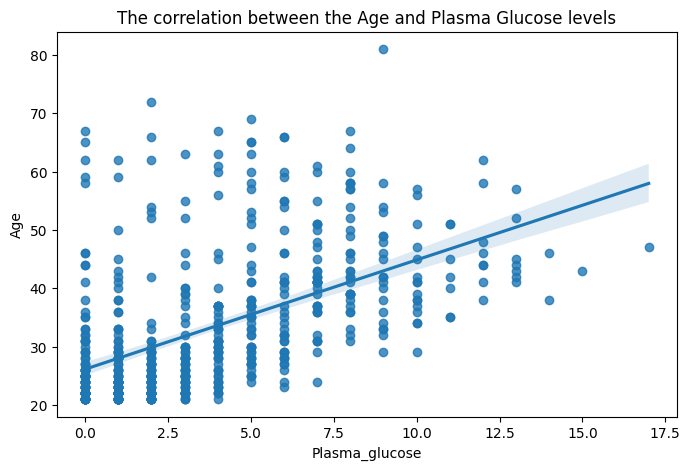

In [34]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Plasma_glucose', y='Age', data=train_df)
plt.title('The correlation between the Age and Plasma Glucose levels')
plt.show()

In [35]:
corr_ = train_df['Plasma_glucose'].corr(train_df['Age'])
round(corr_, 6)

0.532545

**Remark**

It is observed that there is a positive correlation between Plasma glucose levels and age. This indicates that with an increase age, there's a tendency for blood sugar level to increase

## MULTIVARIATE ANALYSIS

**Relationship between Body mass index, blood pressure and Sepsis**

In [36]:
from plotly.offline import iplot
fig_3=px.scatter(train_df, x="Body_mass_index", y= "Blood_Pressure",color= "Sepsis", 
                 title= "Relationship Between Blood Pressure and Body mass index with Relation To Sepsis")

iplot(fig_3)

**Remarks**



**Correlation**


The extent to which the variables are linearly related is also explored

In [37]:
train_df

,ID,Plasma_glucose,Blood_Work_Result_1,Blood_Pressure,Blood_Work_Result_2,Blood_Work_Result_3,Body_mass_index,Blood_Work_Result_4,Age,Insurance,Sepsis,Age_group,BMI Ranges
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive,50-59,Obesity
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative,30-39,Over Weight
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive,30-39,Healthy Weight
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative,20-29,Over Weight
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive,30-39,Severe Obesity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative,30-39,Obesity
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive,20-29,Obesity
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative,40-49,Severe Obesity
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative,20-29,Over Weight


In [38]:
# corr_matrix = train_df.corr()
# corr_matrix
# Select only numeric columns for correlation calculation
numeric_columns = train_df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = train_df[numeric_columns].corr()

# Display the correlation matrix
print(corr_matrix)

                     Plasma_glucose  Blood_Work_Result_1  Blood_Pressure  \
Plasma_glucose             1.000000             0.139541        0.116680   
Blood_Work_Result_1        0.139541             1.000000        0.143064   
Blood_Pressure             0.116680             0.143064        1.000000   
Blood_Work_Result_2       -0.080902             0.054430        0.197535   
Blood_Work_Result_3       -0.054812             0.339818        0.095281   
Body_mass_index            0.033482             0.215949        0.269482   
Blood_Work_Result_4       -0.052230             0.144665        0.008318   
Age                        0.532545             0.274057        0.225625   
Insurance                  0.084631             0.050993       -0.025365   

                     Blood_Work_Result_2  Blood_Work_Result_3  \
Plasma_glucose                 -0.080902            -0.054812   
Blood_Work_Result_1             0.054430             0.339818   
Blood_Pressure                  0.197535    

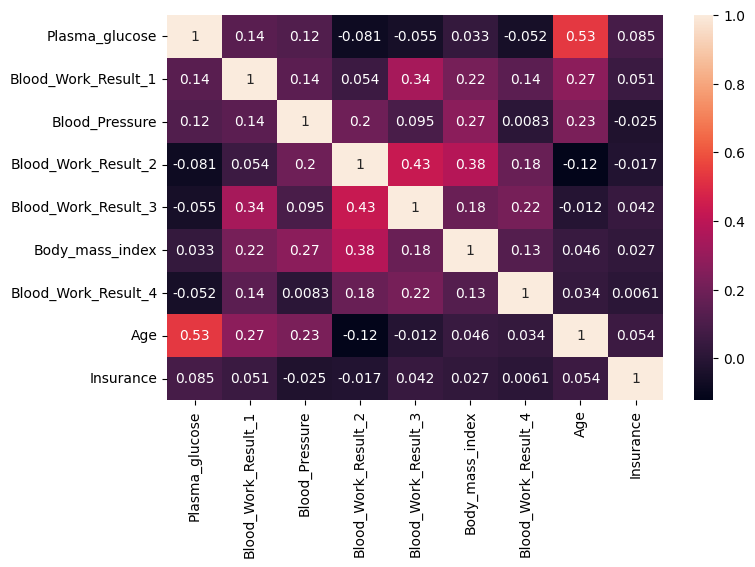

In [39]:
# Plot a heatmap for the correlations
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True)
plt.show()

**Remarks**

There was a strong correlation (0.53) between Plasma Glucose and Age and it was the highest correlation. This give an indication that as one ages, there is a tendency for one's plasma glucose level to increase.
The lowest correlation was -0.012 between Blood Work Result-3 and Age.


## Feature Processing

In this section, the dataset is cleaned and the best features are processed for the models.

In [40]:
train_df.columns

Index(['ID', 'Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index',
       'Blood_Work_Result_4', 'Age', 'Insurance', 'Sepsis', 'Age_group',
       'BMI Ranges'],
      dtype='object')

In [41]:
import phik
#the correlation of other features with sepsis
sepsis_corr= train_df.phik_matrix().loc["Sepsis"]
#sorting the values 
sepsis_cor=sepsis_corr.sort_values()
sepsis_corr

interval columns not set, guessing: ['Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure', 'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index', 'Blood_Work_Result_4', 'Age', 'Insurance']


ID                     1.000000
Plasma_glucose         0.281540
Blood_Work_Result_1    0.467470
Blood_Pressure         0.205504
Blood_Work_Result_2    0.282151
Blood_Work_Result_3    0.258157
Body_mass_index        0.327176
Blood_Work_Result_4    0.231272
Age                    0.388561
Insurance              0.066436
Sepsis                 1.000000
Age_group              0.386939
BMI Ranges             0.282772
Name: Sepsis, dtype: float64

Text(0.5, 1.0, 'Phik Correlation Matrix for all  Features')

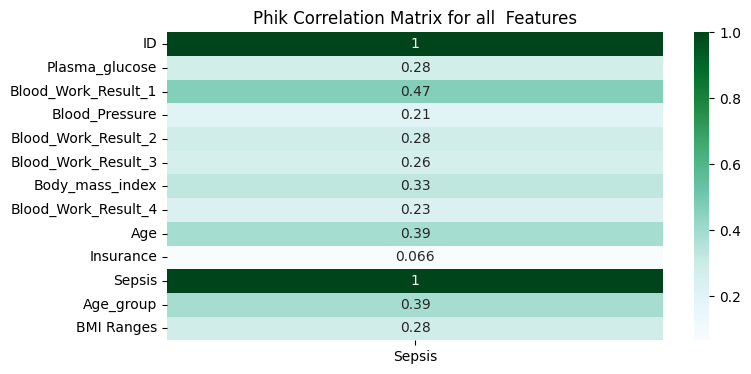

In [42]:
#ploting the phi-k correlation matrix
plt.figure(figsize= (8,4))
sns.heatmap(sepsis_corr.to_frame(), annot= True, cmap= "BuGn")
plt.title("Phik Correlation Matrix for all  Features")

**Remark**

ID will be dropped since its not relevant for the analysis. Age_group will also be dropped since it is similar to age

In [43]:
# Drop columns that won't be used
train_df.drop(columns=['ID','Age_group','BMI Ranges'], axis=1, inplace=True)
test_df.drop(columns=['ID', ], axis=1, inplace=True)

In [44]:
# Checking for the unique values of the target(sepsis)
train_df['Sepsis'].unique()

array(['Positive', 'Negative'], dtype=object)

In [45]:
# Substitute Positive with 1 and Negative with 0 in target column to facilitate analysis
train_df['Sepsis'].replace(to_replace='Positive', value='1', inplace=True)
train_df['Sepsis'].replace(to_replace='Negative', value='0', inplace=True)


In [46]:
train_df

,Plasma_glucose,Blood_Work_Result_1,Blood_Pressure,Blood_Work_Result_2,Blood_Work_Result_3,Body_mass_index,Blood_Work_Result_4,Age,Insurance,Sepsis
0,6,148,72,35,0,33.6,0.627,50,0,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,1,0
4,0,137,40,35,168,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0,0
595,0,188,82,14,185,32.0,0.682,22,1,1
596,0,67,76,0,0,45.3,0.194,46,1,0
597,1,89,24,19,25,27.8,0.559,21,0,0


In [47]:
# convert sepsis object type to integer
train_df['Sepsis'] = train_df['Sepsis'].astype('int')

In [48]:
train_df.head(5)

,Plasma_glucose,Blood_Work_Result_1,Blood_Pressure,Blood_Work_Result_2,Blood_Work_Result_3,Body_mass_index,Blood_Work_Result_4,Age,Insurance,Sepsis
0,6,148,72,35,0,33.6,0.627,50,0,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,1,0
4,0,137,40,35,168,43.1,2.288,33,1,1


In [49]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Plasma_glucose       599 non-null    int64  
 1   Blood_Work_Result_1  599 non-null    int64  
 2   Blood_Pressure       599 non-null    int64  
 3   Blood_Work_Result_2  599 non-null    int64  
 4   Blood_Work_Result_3  599 non-null    int64  
 5   Body_mass_index      599 non-null    float64
 6   Blood_Work_Result_4  599 non-null    float64
 7   Age                  599 non-null    int64  
 8   Insurance            599 non-null    int64  
 9   Sepsis               599 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 46.9 KB


In [50]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Plasma_glucose       169 non-null    int64  
 1   Blood_Work_Result_1  169 non-null    int64  
 2   Blood_Pressure       169 non-null    int64  
 3   Blood_Work_Result_2  169 non-null    int64  
 4   Blood_Work_Result_3  169 non-null    int64  
 5   Body_mass_index      169 non-null    float64
 6   Blood_Work_Result_4  169 non-null    float64
 7   Age                  169 non-null    int64  
 8   Insurance            169 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 12.0 KB


In [51]:
#counting the unique values in the target(sepsis)

train_df.Sepsis.value_counts()

Sepsis
0    391
1    208
Name: count, dtype: int64

**Splitting Data**

In [52]:
X = train_df.drop('Sepsis', axis=1)
y = train_df.Sepsis

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2, random_state=42, stratify= y)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((479, 9), (120, 9), (479,), (120,))

In [55]:
# checking for missing values
X_train.isna().sum()

Plasma_glucose         0
Blood_Work_Result_1    0
Blood_Pressure         0
Blood_Work_Result_2    0
Blood_Work_Result_3    0
Body_mass_index        0
Blood_Work_Result_4    0
Age                    0
Insurance              0
dtype: int64

In [56]:
X_test.isna().sum()

Plasma_glucose         0
Blood_Work_Result_1    0
Blood_Pressure         0
Blood_Work_Result_2    0
Blood_Work_Result_3    0
Body_mass_index        0
Blood_Work_Result_4    0
Age                    0
Insurance              0
dtype: int64

There are no missing values

In [57]:
# check for datatypes
def check_dtypes(data_frame):
    dtypes_dict = data_frame.dtypes.to_dict()
    return dtypes_dict

In [58]:
check_dtypes(X_train)

{'Plasma_glucose': dtype('int64'),
 'Blood_Work_Result_1': dtype('int64'),
 'Blood_Pressure': dtype('int64'),
 'Blood_Work_Result_2': dtype('int64'),
 'Blood_Work_Result_3': dtype('int64'),
 'Body_mass_index': dtype('float64'),
 'Blood_Work_Result_4': dtype('float64'),
 'Age': dtype('int64'),
 'Insurance': dtype('int64')}

There are no categorical variables 

In [59]:
numerical_attributes= X_train.columns

**Creating Pipelines**

In [60]:
# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.compose import ColumnTransformer

from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score

In [61]:
from sklearn.pipeline import Pipeline, make_pipeline
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])

In [62]:
from sklearn.compose import ColumnTransformer
#Transforming thr numerical column
full_pipeline=ColumnTransformer([('numerical_pipe',numerical_pipeline,numerical_attributes)])

In [63]:
# Save the full_pipeline with joblib
joblib.dump(full_pipeline, 'pipeline.joblib')

['pipeline.joblib']

**Modelling**

In [64]:
models_trained= [] # empty list

**DecisionTree Classifier**

In [65]:
# model_DT= DecisionTreeClassifier() 

# from imblearn.pipeline import Pipeline

model_DT = Pipeline([
    ("column_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42, max_depth=6, min_samples_leaf=8)))
])

In [66]:
model_DT.fit(X_train,y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('numerical_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index',
       'Blood_Work_Result_4', 'Age', 'Insurance'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')),
                ('model',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6,
                                                                         min_samples_leaf=8,
                                                                         random_state=42)))])

In [67]:
y_predict1= model_DT.predict(X_test)



In [68]:
y_predict1

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

roc_auc1 = roc_auc_score(y_test ,y_predict1)
roc_auc1

0.7252747252747253

In [70]:
report = classification_report(y_test, y_predict1)

report += f"\nROC AUC Score: {roc_auc1:.4f}"

print(report)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        78
           1       0.64      0.64      0.64        42

    accuracy                           0.75       120
   macro avg       0.73      0.73      0.73       120
weighted avg       0.75      0.75      0.75       120

ROC AUC Score: 0.7253


It is observed that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

Hence we check the ROC AUC score. measures the performance of a classification model based on the area under the ROC curve. It is a value between 0 and 1, with higher values indicating better model performance in distinguishing between positive and negative classes. From our populated score, we can see the score is quite low.

Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

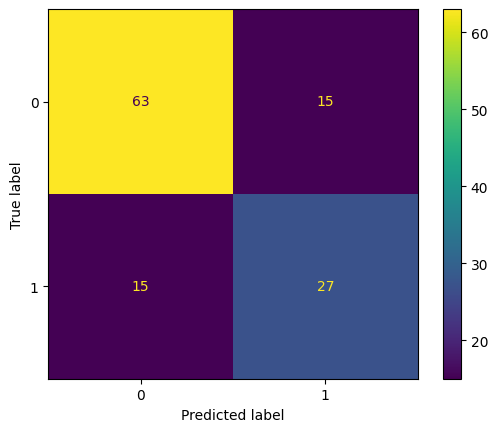

In [71]:
ConfusionMatrixDisplay.from_predictions(y_predict1,y_test)

In [72]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

model_DT_SMOTE = Pipeline([
    ("column_trans", full_pipeline),
    ("smote", SMOTE(random_state=100)),  # Apply SMOTE for oversampling
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42, max_depth=6, min_samples_leaf=8)))
])

In [73]:
model_DT_SMOTE.fit(X_train,y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('numerical_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index',
       'Blood_Work_Result_4', 'Age', 'Insurance'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=100)),
                ('feature_selection', SelectKBest(k='all')),
                ('model',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6,
                                                                         min_samples_leaf=8,
                                                                         random_state=42)))])

In [74]:
y_predict2= model_DT_SMOTE.predict(X_test)



In [75]:
y_predict2

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1])

In [76]:
roc_auc2 = roc_auc_score(y_test ,y_predict2)
roc_auc2

0.7152014652014652

In [77]:
report = classification_report(y_test, y_predict2)

report += f"\nROC AUC Score: {roc_auc2:.4f}"

print(report)

              precision    recall  f1-score   support

           0       0.83      0.69      0.76        78
           1       0.56      0.74      0.64        42

    accuracy                           0.71       120
   macro avg       0.70      0.72      0.70       120
weighted avg       0.74      0.71      0.71       120

ROC AUC Score: 0.7152


Adding balance improves the model


Increase in the **positive patients(1)** Recall means less false negatives.

It worth noting that while recall on positive patients increased, precision decreased. This is ok thanks to the precision-recall trade off

**RANDOM FOREST CLASSIFIER**

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
#instantiate the model
model_RFC=RandomForestClassifier()

model_RFC= Pipeline([
    ("col_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model", BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42, max_depth=6, min_samples_leaf=8)))
])

In [80]:
model_RFC.fit(X_train,y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('numerical_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index',
       'Blood_Work_Result_4', 'Age', 'Insurance'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')),
                ('model',
                 BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=6,
                                                                         min_samples_leaf=8,
                                                                         random_state=42)))])

In [81]:
y_predict3= model_RFC.predict(X_test)

In [82]:
roc_auc3 = roc_auc_score(y_test ,y_predict3)
roc_auc3

0.6648351648351649

In [83]:
report = classification_report(y_test, y_predict3)

report += f"\nROC AUC Score: {roc_auc3:.4f}"

print(report)

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        78
           1       0.57      0.55      0.56        42

    accuracy                           0.70       120
   macro avg       0.67      0.66      0.67       120
weighted avg       0.70      0.70      0.70       120

ROC AUC Score: 0.6648


**Random classifier with Balancing**

In [84]:
#instantiate model
model_RFC_SMOTE = Pipeline([
    ("column_trans", full_pipeline),
    ("smote", SMOTE(random_state=100)),  # Apply SMOTE for oversampling
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model", BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42, max_depth=6, min_samples_leaf=8)))
])

In [85]:
model_RFC_SMOTE.fit(X_train,y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('numerical_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index',
       'Blood_Work_Result_4', 'Age', 'Insurance'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=100)),
                ('feature_selection', SelectKBest(k='all')),
                ('model',
                 BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=6,
                                                                         min_samples_leaf=8,
                                                                         random_state=42)))])

In [86]:
y_predict4= model_RFC_SMOTE.predict(X_test)
y_predict4

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [87]:
roc_auc4 = roc_auc_score(y_test ,y_predict4)
roc_auc4

0.728021978021978

In [88]:
report = classification_report(y_test, y_predict4)

report += f"\nROC AUC Score: {roc_auc4:.4f}"

print(report)

              precision    recall  f1-score   support

           0       0.84      0.72      0.77        78
           1       0.58      0.74      0.65        42

    accuracy                           0.73       120
   macro avg       0.71      0.73      0.71       120
weighted avg       0.75      0.72      0.73       120

ROC AUC Score: 0.7280


**LOGISTIC REGRESSOR**

In [89]:
# model_LR=LogisticRegression()
from sklearn.linear_model import LogisticRegression

model_LR = Pipeline([
    ("col_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model", BaggingClassifier(base_estimator=LogisticRegression(random_state=42)))
])


In [90]:
model_LR.fit(X_train,y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('numerical_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index',
       'Blood_Work_Result_4', 'Age', 'Insurance'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')),
                ('model',
                 BaggingClassifier(base_estimator=LogisticRegression(random_state=42)))])

In [91]:
y_predict5= model_LR.predict(X_test)

In [92]:
roc_auc5 = roc_auc_score(y_test ,y_predict5)
roc_auc5

0.7252747252747253

In [93]:
report = classification_report(y_test, y_predict5)

report += f"\nROC AUC Score: {roc_auc5:.4f}"

print(report)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        78
           1       0.64      0.64      0.64        42

    accuracy                           0.75       120
   macro avg       0.73      0.73      0.73       120
weighted avg       0.75      0.75      0.75       120

ROC AUC Score: 0.7253


**LOGISTIC REGRESSOR WITH BALANCE**

In [94]:
#instantiate model
model_LR_SMOTE = Pipeline([
    ("column_trans", full_pipeline),
    ("smote", SMOTE(random_state=100)),  # Apply SMOTE for oversampling
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model", BaggingClassifier(base_estimator=LogisticRegression(random_state=42)))
])

In [95]:
# Fit the pipeline on the resampled data

model_LR_SMOTE = model_LR_SMOTE.fit(X_train, y_train)
model_LR_SMOTE

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('numerical_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index',
       'Blood_Work_Result_4', 'Age', 'Insurance'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=100)),
                ('feature_selection', SelectKBest(k='all')),
                ('model',
                 BaggingClassifier(base_estimator=LogisticRegression(random_state=42)))])

In [96]:
y_predict6= model_LR_SMOTE.predict(X_test)

In [97]:
roc_auc6 = roc_auc_score(y_test ,y_predict6)
roc_auc6

0.7335164835164835

In [98]:
report = classification_report(y_test, y_predict6)

report += f"\nROC AUC Score: {roc_auc6:.4f}"

print(report)

              precision    recall  f1-score   support

           0       0.85      0.71      0.77        78
           1       0.58      0.76      0.66        42

    accuracy                           0.73       120
   macro avg       0.71      0.73      0.71       120
weighted avg       0.75      0.72      0.73       120

ROC AUC Score: 0.7335


**SUPPORT VECTOR MACHINE**

In [99]:
# instantiate model
model_SV=SVC()

model_SV= Pipeline([
    ("col_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model", BaggingClassifier(base_estimator=SVC(gamma='auto')))
])

In [100]:
model_SV.fit(X_train,y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('numerical_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index',
       'Blood_Work_Result_4', 'Age', 'Insurance'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')),
                ('model', BaggingClassifier(base_estimator=SVC(gamma='auto')))])

In [101]:
y_predict7= model_SV.predict(X_test)

In [102]:
roc_auc7 = roc_auc_score(y_test ,y_predict7)
roc_auc7

0.6602564102564102

In [103]:
report = classification_report(y_test, y_predict7)

report += f"\nROC AUC Score: {roc_auc7:.4f}"

print(report)

              precision    recall  f1-score   support

           0       0.75      0.82      0.79        78
           1       0.60      0.50      0.55        42

    accuracy                           0.71       120
   macro avg       0.68      0.66      0.67       120
weighted avg       0.70      0.71      0.70       120

ROC AUC Score: 0.6603


**SV with Balance**

In [104]:
#instantiate model
model_SV_SMOTE = Pipeline([
    ("column_trans", full_pipeline),
    ("smote", SMOTE(random_state=100)),  # Apply SMOTE for oversampling
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model", BaggingClassifier(base_estimator=SVC(gamma='auto')))
])

In [105]:
# model_SV_SMOTE.fit(X_train,y_train)

# Fit the pipeline on the resampled data

model_SV_SMOTE = model_SV_SMOTE.fit(X_train, y_train)
model_SV_SMOTE

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('numerical_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index',
       'Blood_Work_Result_4', 'Age', 'Insurance'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=100)),
                ('feature_selection', SelectKBest(k='all')),
                ('model', BaggingClassifier(base_estimator=SVC(gamma='auto')))])

In [106]:
y_predict8= model_SV.predict(X_test)

In [107]:
roc_auc8 = roc_auc_score(y_test ,y_predict8)
roc_auc8

0.6602564102564102

In [108]:
report = classification_report(y_test, y_predict8)

report += f"\nROC AUC Score: {roc_auc8:.4f}"

print(report)

              precision    recall  f1-score   support

           0       0.75      0.82      0.79        78
           1       0.60      0.50      0.55        42

    accuracy                           0.71       120
   macro avg       0.68      0.66      0.67       120
weighted avg       0.70      0.71      0.70       120

ROC AUC Score: 0.6603


**XGBOOST MODEL**

In [109]:
# instantiate the model
model_XGB=XGBClassifier()

model_XGB= Pipeline([
    ("col_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model", BaggingClassifier(base_estimator=XGBClassifier(random_state=42)))
])

In [110]:
model_XGB.fit(X_train,y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('numerical_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index',
       'Blood_Work_Result_4', 'Age', 'Insurance'],
      dtype='object'))])),
                ('feature_s...
                                                                grow_policy=None,
                                                                importance_type=None,
                                                                interaction_constraints=None,
                                                                learning_rate=None,
                                                                max_bin=None,
                                                                max_cat_threshold=None,
                                                                max_cat_to_onehot=None,
                                                                max_delta_step=None,
                                                                max_depth=None,
                                                                max_leaves=None,
                                                                min_child_weight=None,
                                                                missing=nan,
                                                                monotone_constraints=None,
                                                                multi_strategy=None,
                                                                n_estimators=None,
                                                                n_jobs=None,
                                                                num_parallel_tree=None,
                                                                random_state=42, ...)))])

In [111]:
y_predict9= model_XGB.predict(X_test)

In [112]:
roc_auc9 = roc_auc_score(y_test ,y_predict9)
roc_auc9

0.6694139194139194

In [113]:
report = classification_report(y_test, y_predict9)

report += f"\nROC AUC Score: {roc_auc9:.4f}"

print(report)

              precision    recall  f1-score   support

           0       0.77      0.74      0.76        78
           1       0.56      0.60      0.57        42

    accuracy                           0.69       120
   macro avg       0.66      0.67      0.67       120
weighted avg       0.70      0.69      0.69       120

ROC AUC Score: 0.6694


**XGBOOST WITH BALANCE**

In [114]:
#instantiate model
model_XGB_SMOTE = Pipeline([
    ("column_trans", full_pipeline),
    ("smote", SMOTE(random_state=100)),  # Apply SMOTE for oversampling
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model", BaggingClassifier(base_estimator=XGBClassifier(random_state=42)))
])

In [115]:
# model_XGB_SMOTE.fit(X_train,y_train)
model_XGB_SMOTE = model_XGB_SMOTE.fit(X_train,y_train)
model_XGB_SMOTE

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('numerical_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index',
       'Blood_Work_Result_4', 'Age', 'Insurance'],
      dtype='object'))])),
                ('smote'...
                                                                grow_policy=None,
                                                                importance_type=None,
                                                                interaction_constraints=None,
                                                                learning_rate=None,
                                                                max_bin=None,
                                                                max_cat_threshold=None,
                                                                max_cat_to_onehot=None,
                                                                max_delta_step=None,
                                                                max_depth=None,
                                                                max_leaves=None,
                                                                min_child_weight=None,
                                                                missing=nan,
                                                                monotone_constraints=None,
                                                                multi_strategy=None,
                                                                n_estimators=None,
                                                                n_jobs=None,
                                                                num_parallel_tree=None,
                                                                random_state=42, ...)))])

In [116]:
y_predict10= model_XGB_SMOTE.predict(X_test)

In [117]:
roc_auc10 = roc_auc_score(y_test ,y_predict10)
roc_auc10

0.6849816849816851

In [118]:
report = classification_report(y_test, y_predict10)

report += f"\nROC AUC Score: {roc_auc10:.4f}"

print(report)

              precision    recall  f1-score   support

           0       0.80      0.68      0.74        78
           1       0.54      0.69      0.60        42

    accuracy                           0.68       120
   macro avg       0.67      0.68      0.67       120
weighted avg       0.71      0.68      0.69       120

ROC AUC Score: 0.6850


**Model Evaluation**

In [119]:
metrics_df = pd.DataFrame(columns=['Model', 'ROC_AUC', 'Precision', 'Recall', 'F1 Score'])

**Looking at classifiers without balancing**

In [120]:
# models = [
#     (model_DT, 'Decision Tree'),
#     (model_RFC, 'Random Forest'),
#     (model_SV, 'Support Vector'),
#     (model_LR, 'Logistic Regression'),
#     (model_XGB, 'XGB')
# ]

# metrics_df = pd.DataFrame(columns=['Model', 'ROC_AUC', 'Precision', 'Recall', 'F1 Score'])

# for model, model_name in models:
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     roc_auc = roc_auc_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)

#     metrics_df = metrics_df.append({'Model': model_name, 'ROC_AUC': roc_auc,
#                                     'Precision': precision, 'Recall': recall, 'F1 Score': f1}, ignore_index=True)
    
#     metrics_df = metrics_df.sort_values(by='F1 Score', ascending=False)

#metrics_df
import pandas as pd
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

models = [
    (model_DT, 'Decision Tree'),
    (model_RFC, 'Random Forest'),
    (model_SV, 'Support Vector'),
    (model_LR, 'Logistic Regression'),
    (model_XGB, 'XGB')
]

metrics_list = []

for model, model_name in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics_list.append({'Model': model_name, 'ROC_AUC': roc_auc,
                         'Precision': precision, 'Recall': recall, 'F1 Score': f1})

# Convert the list of dictionaries to a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Sort the DataFrame by 'F1 Score' column
metrics_df = metrics_df.sort_values(by='F1 Score', ascending=False)

# Display the final DataFrame
print(metrics_df)


                 Model   ROC_AUC  Precision    Recall  F1 Score
3  Logistic Regression  0.725275   0.642857  0.642857  0.642857
4                  XGB  0.695055   0.609756  0.595238  0.602410
2       Support Vector  0.665751   0.594595  0.523810  0.556962
0        Decision Tree  0.659341   0.578947  0.523810  0.550000
1        Random Forest  0.659341   0.578947  0.523810  0.550000


**Looking at Classifiers with Balancing**

In [121]:
# models = [
#     (model_DT_SMOTE, 'Decision Tree Bal'),
#     (model_RFC_SMOTE, 'Random Forest Bal'),
#     (model_SV_SMOTE, 'Support Vector Bal'),
#     (model_LR_SMOTE, 'Logistic Regression Bal'),
#     (model_XGB_SMOTE, 'XGB Bal')
# ]

# metrics_bal_df = pd.DataFrame(columns=['Model', 'ROC_AUC', 'Precision', 'Recall', 'F1 Score'])

# for model, model_name in models:
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     roc_auc = roc_auc_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)

#     metrics_bal_df = metrics_bal_df.append({'Model': model_name, 'ROC_AUC': roc_auc,
#                                     'Precision': precision, 'Recall': recall, 'F1 Score': f1}, ignore_index=True)
    
#     metrics_bal_df = metrics_bal_df.sort_values(by='F1 Score', ascending=False)

# metrics_bal_df


import pandas as pd
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

models = [
    (model_DT_SMOTE, 'Decision Tree Bal'),
    (model_RFC_SMOTE, 'Random Forest Bal'),
    (model_SV_SMOTE, 'Support Vector Bal'),
    (model_LR_SMOTE, 'Logistic Regression Bal'),
    (model_XGB_SMOTE, 'XGB Bal')
]

metrics_bal_list = []

for model, model_name in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics_bal_list.append({'Model': model_name, 'ROC_AUC': roc_auc,
                              'Precision': precision, 'Recall': recall, 'F1 Score': f1})

# Convert the list of dictionaries to a DataFrame
metrics_bal_df = pd.DataFrame(metrics_bal_list)

# Sort the DataFrame by 'F1 Score' column
metrics_bal_df = metrics_bal_df.sort_values(by='F1 Score', ascending=False)

# Display the final DataFrame
print(metrics_bal_df)


                     Model   ROC_AUC  Precision    Recall  F1 Score
3  Logistic Regression Bal  0.739927   0.592593  0.761905  0.666667
1        Random Forest Bal  0.721612   0.574074  0.738095  0.645833
0        Decision Tree Bal  0.714286   0.551724  0.761905  0.640000
4                  XGB Bal  0.696886   0.545455  0.714286  0.618557
2       Support Vector Bal  0.679487   0.538462  0.666667  0.595745


**REMARK**

From the two tables, the following observations were made

* The two best models we used based on F1 scores are Logistic Regression (with balancing) and Random Forest (without balancing)

**Hyperparameter Tuning**

In [122]:
models = [model_LR_SMOTE, model_RFC_SMOTE]

 **Tuning Linear Regression Model**

In [123]:
model_LR_SMOTE

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('numerical_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index',
       'Blood_Work_Result_4', 'Age', 'Insurance'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=100)),
                ('feature_selection', SelectKBest(k='all')),
                ('model',
                 BaggingClassifier(base_estimator=LogisticRegression(random_state=42)))])

In [124]:
##We are going to create a copy of the smote_dt and rename it for the purpose of hyperparameter tuning

HP_model_LR = Pipeline([
    ("column_trans", full_pipeline),
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model", BaggingClassifier(base_estimator=LogisticRegression(random_state=42)))
])


In [125]:
models[0].get_params()

{'memory': None,
 'steps': [('column_trans',
   ColumnTransformer(transformers=[('numerical_pipe',
                                    Pipeline(steps=[('imputer', SimpleImputer()),
                                                    ('scaler', StandardScaler())]),
                                    Index(['Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
          'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index',
          'Blood_Work_Result_4', 'Age', 'Insurance'],
         dtype='object'))])),
  ('smote', SMOTE(random_state=100)),
  ('feature_selection', SelectKBest(k='all')),
  ('model',
   BaggingClassifier(base_estimator=LogisticRegression(random_state=42)))],
 'verbose': False,
 'column_trans': ColumnTransformer(transformers=[('numerical_pipe',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('scaler', StandardScaler())]),
                                  Index(['Plasma_glu

In [126]:
model_LR_params = {
    'model__bootstrap': [True,False] ,
    'model__bootstrap_features':[True ,False],
    'model__max_features': [5,10,20],
    'model__n_estimators': [50,100,200],
    'model__warm_start': [True, False]
}

In [127]:
## setting our parameters and telling it to return the model with the lowest log loss
## the score is setting log loss as our metric, and also, I am telling it to choose the model with the lowest score
## the need_proba is telling it to accept returned values and calculate the probability of each predicted label 

Grid_HPT_LR = GridSearchCV(estimator = HP_model_LR,
                           param_grid = model_LR_params, 
                           cv = 5, 
                           n_jobs = 1, 
                           verbose = 3, 
                           scoring = ['f1','precision','recall','roc_auc'],
                           refit = 'f1')

In [128]:
Grid_HPT_LR.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END model__bootstrap=True, model__bootstrap_features=True, model__max_features=5, model__n_estimators=50, model__warm_start=True; f1: (test=0.426) precision: (test=0.714) recall: (test=0.303) roc_auc: (test=0.825) total time=   2.0s
[CV 2/5] END model__bootstrap=True, model__bootstrap_features=True, model__max_features=5, model__n_estimators=50, model__warm_start=True; f1: (test=0.656) precision: (test=0.714) recall: (test=0.606) roc_auc: (test=0.774) total time=   2.0s
[CV 3/5] END model__bootstrap=True, model__bootstrap_features=True, model__max_features=5, model__n_estimators=50, model__warm_start=True; f1: (test=0.489) precision: (test=0.917) recall: (test=0.333) roc_auc: (test=0.875) total time=   3.2s


[CV 4/5] END model__bootstrap=True, model__bootstrap_features=True, model__max_features=5, model__n_estimators=50, model__warm_start=True; f1: (test=0.458) precision: (test=0.786) recall: (test=0.324) roc_auc: (test=0.811) total time=   2.1s
[CV 5/5] END model__bootstrap=True, model__bootstrap_features=True, model__max_features=5, model__n_estimators=50, model__warm_start=True; f1: (test=0.549) precision: (test=0.778) recall: (test=0.424) roc_auc: (test=0.857) total time=   1.9s
[CV 1/5] END model__bootstrap=True, model__bootstrap_features=True, model__max_features=5, model__n_estimators=50, model__warm_start=False; f1: (test=0.618) precision: (test=0.773) recall: (test=0.515) roc_auc: (test=0.848) total time=   1.8s
[CV 2/5] END model__bootstrap=True, model__bootstrap_features=True, model__max_features=5, model__n_estimators=50, model__warm_start=False; f1: (test=0.655) precision: (test=0.760) recall: (test=0.576) roc_auc: (test=0.769) total time=   2.0s
[CV 3/5] END model__bootstrap=

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(transformers=[('numerical_pipe',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index',
       'Blood_Work_Result_4', 'Age', 'Insurance'],...
                                        SelectKBest(k='all')),
                                       ('model',
                                        BaggingClassifier(base_estimator=LogisticRegression(random_state=42)))]),
             n_jobs=1,
             param_grid={'model__bootstrap': [True, False],
                         'model__bootstrap_features': [True, False],
                         'model__max_features': [5, 10, 20],
                         'model__n_estimators': [50, 100, 200],
                         'model__warm_start': [True, False]},
             refit='f1', scoring=['f1', 'precision', 'recall', 'roc_auc'],
             verbose=3)

In [129]:
# corr_matrix = train_df.corr()
# corr_matrix
# Select only numeric columns for correlation calculation
numeric_columns = train_df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = train_df[numeric_columns].corr()

# Display the correlation matrix
print(corr_matrix)

                     Plasma_glucose  Blood_Work_Result_1  Blood_Pressure  \
Plasma_glucose             1.000000             0.139541        0.116680   
Blood_Work_Result_1        0.139541             1.000000        0.143064   
Blood_Pressure             0.116680             0.143064        1.000000   
Blood_Work_Result_2       -0.080902             0.054430        0.197535   
Blood_Work_Result_3       -0.054812             0.339818        0.095281   
Body_mass_index            0.033482             0.215949        0.269482   
Blood_Work_Result_4       -0.052230             0.144665        0.008318   
Age                        0.532545             0.274057        0.225625   
Insurance                  0.084631             0.050993       -0.025365   
Sepsis                     0.207115             0.449719        0.061086   

                     Blood_Work_Result_2  Blood_Work_Result_3  \
Plasma_glucose                 -0.080902            -0.054812   
Blood_Work_Result_1             0

In [130]:
model_LR_tuned = Grid_HPT_LR.best_estimator_

In [131]:
model_LR_tuned

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('numerical_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index',
       'Blood_Work_Result_4', 'Age', 'Insurance'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')),
                ('model',
                 BaggingClassifier(base_estimator=LogisticRegression(random_state=42),
                                   bootstrap=False, max_features=5,
                                   n_estimators=50, warm_start=True))])

In [132]:
models.append(model_LR_tuned)

In [133]:
models

[Pipeline(steps=[('column_trans',
                  ColumnTransformer(transformers=[('numerical_pipe',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer()),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                   Index(['Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
        'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index',
        'Blood_Work_Result_4', 'Age', 'Insurance'],
       dtype='object'))])),
                 ('smote', SMOTE(random_state=100)),
                 ('feature_selection', SelectKBest(k='all')),
                 ('model',
                  BaggingClassifier(base_estimator=LogisticRegression(random_state=42)))]),
 Pipeline(steps=[('column_trans',
                  ColumnTra

**Tuning Decision Tree model**

In [134]:
model_DT

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('numerical_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index',
       'Blood_Work_Result_4', 'Age', 'Insurance'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')),
                ('model',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6,
                                                                         min_samples_leaf=8,
                                                                         random_state=42)))])

In [135]:
## We are going to create a copy of the model_RFC_SMOTE and rename it for the purpose of hyperparameter tuning
HP_model_DT = Pipeline([
    ("column_trans", full_pipeline),
    ("smote", SMOTE(random_state=100)),  # Apply SMOTE for oversampling
    ("feature_selection", SelectKBest(score_func=f_classif, k='all')),
    ("model", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42, max_depth=6, min_samples_leaf=8)))
])

HP_model_DT = HP_model_DT.fit(X_train, y_train)

In [136]:
models[1].get_params()

{'memory': None,
 'steps': [('column_trans',
   ColumnTransformer(transformers=[('numerical_pipe',
                                    Pipeline(steps=[('imputer', SimpleImputer()),
                                                    ('scaler', StandardScaler())]),
                                    Index(['Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
          'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index',
          'Blood_Work_Result_4', 'Age', 'Insurance'],
         dtype='object'))])),
  ('smote', SMOTE(random_state=100)),
  ('feature_selection', SelectKBest(k='all')),
  ('model',
   BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=6,
                                                           min_samples_leaf=8,
                                                           random_state=42)))],
 'verbose': False,
 'column_trans': ColumnTransformer(transformers=[('numerical_pipe',
                                  Pipeline(steps=[('imputer

In [137]:
model_DT_params = {
    'model__bootstrap': [True,False] ,
    'model__bootstrap_features':[True ,False],
    'model__base_estimator__max_depth': [5,10,20],
    'model__max_features': [5,10,20],
    'model__n_estimators': [50,100,200],
    'model__warm_start': [True, False]
}

In [138]:
##setting our parametersand telling it to return the model with the lowest log loss
##the scorer is setting log loss as our metric, and also, I am telling it to choose the model with the lowest score
## the need_proba is telling it to accept returned values and calculate the probability of each predicted label 

Grid_HPT_DT = GridSearchCV(estimator = HP_model_DT,
                           param_grid = model_DT_params, 
                           cv = 5, 
                           n_jobs = 1, 
                           verbose = 3, 
                           scoring = ['f1','precision','recall','roc_auc'],
                           refit = 'f1')

In [139]:
Grid_HPT_DT.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END model__base_estimator__max_depth=5, model__bootstrap=True, model__bootstrap_features=True, model__max_features=5, model__n_estimators=50, model__warm_start=True; f1: (test=0.703) precision: (test=0.634) recall: (test=0.788) roc_auc: (test=0.855) total time=   1.3s
[CV 2/5] END model__base_estimator__max_depth=5, model__bootstrap=True, model__bootstrap_features=True, model__max_features=5, model__n_estimators=50, model__warm_start=True; f1: (test=0.649) precision: (test=0.568) recall: (test=0.758) roc_auc: (test=0.795) total time=   1.3s
[CV 3/5] END model__base_estimator__max_depth=5, model__bootstrap=True, model__bootstrap_features=True, model__max_features=5, model__n_estimators=50, model__warm_start=True; f1: (test=0.615) precision: (test=0.625) recall: (test=0.606) roc_auc: (test=0.805) total time=   1.4s
[CV 4/5] END model__base_estimator__max_depth=5, model__bootstrap=True, model__bootstrap_features=True

[CV 2/5] END model__base_estimator__max_depth=5, model__bootstrap=True, model__bootstrap_features=True, model__max_features=5, model__n_estimators=50, model__warm_start=False; f1: (test=0.642) precision: (test=0.542) recall: (test=0.788) roc_auc: (test=0.797) total time=   1.5s
[CV 3/5] END model__base_estimator__max_depth=5, model__bootstrap=True, model__bootstrap_features=True, model__max_features=5, model__n_estimators=50, model__warm_start=False; f1: (test=0.667) precision: (test=0.667) recall: (test=0.667) roc_auc: (test=0.819) total time=   0.8s
[CV 4/5] END model__base_estimator__max_depth=5, model__bootstrap=True, model__bootstrap_features=True, model__max_features=5, model__n_estimators=50, model__warm_start=False; f1: (test=0.696) precision: (test=0.686) recall: (test=0.706) roc_auc: (test=0.826) total time=   1.1s
[CV 5/5] END model__base_estimator__max_depth=5, model__bootstrap=True, model__bootstrap_features=True, model__max_features=5, model__n_estimators=50, model__warm_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(transformers=[('numerical_pipe',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index',
       'Blood_Work_Result_4', 'Age', 'Insurance'],...
                                        BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6,
                                                                                                min_samples_leaf=8,
                                                                                                random_state=42)))]),
             n_jobs=1,
             param_grid={'model__base_estimator__max_depth': [5, 10, 20],
                         'model__bootstrap': [True, False],
                         'model__bootstrap_features': [True, False],
                         'model__max_features': [5, 10, 20],
                         'model__n_estimators': [50, 100, 200],
                         'model__warm_start': [True, False]},
             refit='f1', scoring=['f1', 'precision', 'recall', 'roc_auc'],
             verbose=3)

In [140]:
final_model= Grid_HPT_DT.predict(X_test)

In [141]:
roc_auc11 = roc_auc_score(y_test ,final_model)
roc_auc11

0.7518315018315018

In [142]:
report = classification_report(y_test, final_model)

report += f"\nROC AUC Score: {roc_auc11:.4f}"

print(report)

              precision    recall  f1-score   support

           0       0.86      0.72      0.78        78
           1       0.60      0.79      0.68        42

    accuracy                           0.74       120
   macro avg       0.73      0.75      0.73       120
weighted avg       0.77      0.74      0.75       120

ROC AUC Score: 0.7518


In [143]:
model_DT_tuned = Grid_HPT_DT.best_estimator_

In [144]:
model_DT_tuned

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('numerical_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index',
       'Blood_Work_Result_4', 'Age', 'Insurance'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=100)),
                ('feature_selection', SelectKBest(k='all')),
                ('model',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                                         min_samples_leaf=8,
                                                                         random_state=42),
                                   max_features=5, n_estimators=100))])

In [145]:
models.append(model_DT_tuned)

In [146]:
models

[Pipeline(steps=[('column_trans',
                  ColumnTransformer(transformers=[('numerical_pipe',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer()),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                   Index(['Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
        'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_mass_index',
        'Blood_Work_Result_4', 'Age', 'Insurance'],
       dtype='object'))])),
                 ('smote', SMOTE(random_state=100)),
                 ('feature_selection', SelectKBest(k='all')),
                 ('model',
                  BaggingClassifier(base_estimator=LogisticRegression(random_state=42)))]),
 Pipeline(steps=[('column_trans',
                  ColumnTra

In [147]:
#Create a destination folder
destination = os.path.join('.','export')

In [148]:
import os
import pickle

# Create a destination folder if it does not exist
destination = os.path.join('.', 'export')

if not os.path.exists(destination):
    os.makedirs(destination)

# Your existing code to save the pickle file
with open(os.path.join(destination, 'ml.pkl'), 'wb') as f:
    pickle.dump(models, f)